In [3]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors

In [36]:
def manhattan(x,y):
  return abs(x[0]-y[0])+abs(x[1]-y[1])

def is_valid(point,m,n):
  x=point[0]
  y=point[1]

  if 0<=x<m and 0<=y<n and grid[x,y]!=-1:
    return True
  else:
    return False

def plot_grid(grid,curr,nxt=None):
  cmap=colors.ListedColormap(['black','green','white','yellow'])
  plt.imshow(grid,cmap)
  if nxt:
    plt.title(f'Currently exploring{curr} with neighbours {nxt}')
  else:
    plt.title(f'Currently exploring {curr}')
  plt.show()

In [37]:
grid=np.ones((5,4))
grid[0,3]=-1
grid[1,1]=-1
grid[3,0]=-1
grid[3,2]=-1
grid[3,3]=-1

grid

array([[ 1.,  1.,  1., -1.],
       [ 1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [-1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.]])

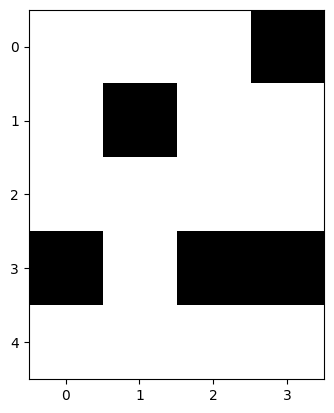

In [38]:
cmap=colors.ListedColormap(['black','white'])
plt.imshow(grid,cmap)
plt.show()

In [39]:
def tree_search(grid,start,goal):
  m,n=grid.shape
  frontier=[]

  heapq.heappush(frontier,[manhattan(start,goal),0,start])

  while frontier:
    f,g,current=heapq.heappop(frontier)
    if not is_valid(current,m,n):
      continue
    if grid[current[0],current[1]]==-1:
      continue
    grid[current[0],current[1]]=0

    if current==goal:
      plot_grid(grid,current)
      return 'Goal reached'

    directions=[(-1,0),(1,0),(0,-1),(0,1)]

    for d in directions:
      new=current+np.array(d)
      next=list(new)

      if not is_valid(next,m,n):
        continue

      g_next=g+1
      f_next=g_next+manhattan(next,goal)

      heapq.heappush(frontier,[f_next,g_next,next])

      if is_valid(next,m,n):
        grid[next[0],next[1]]=2
      plot_grid(grid,current,next)
  plot_grid(grid,current)

  return 'Goal not found'



In [40]:
grid=np.ones((5,4))
grid[0,3]=-1
grid[1,2]=-1
grid[3,3]=-1
grid[3,1]=-1
grid[1,0]=-1
grid[4,1]=-1
grid

array([[ 1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.],
       [ 1., -1.,  1.,  1.]])

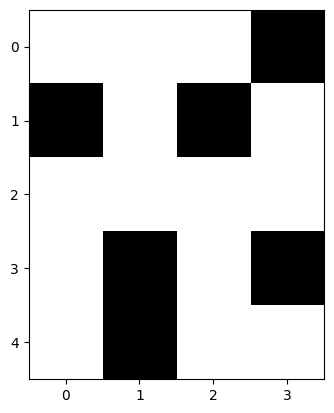

In [41]:
cmap=colors.ListedColormap(['black','white'])
plt.imshow(grid,cmap)
plt.show()

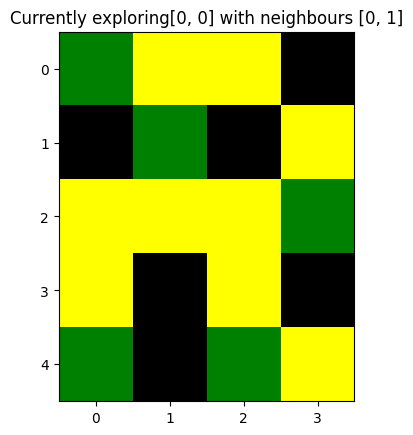

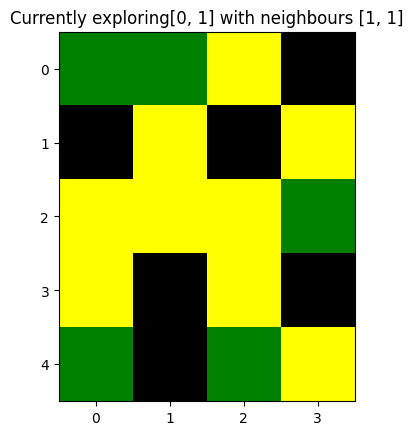

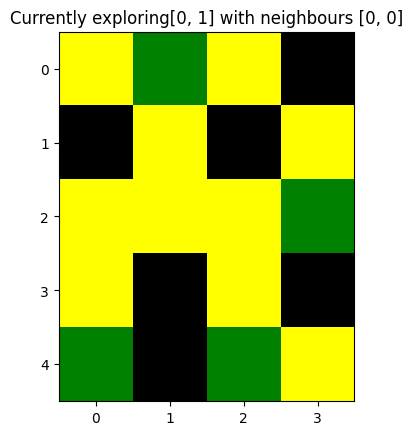

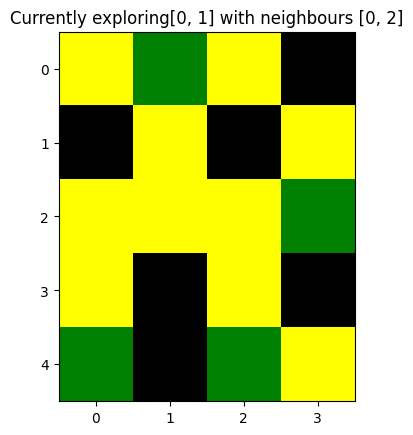

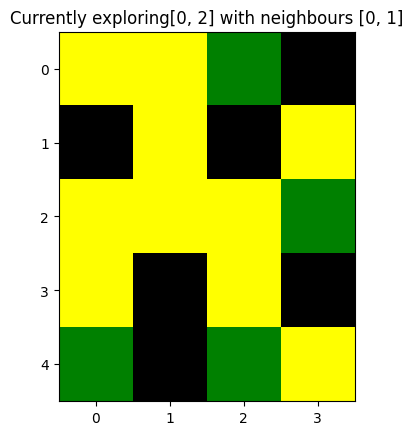

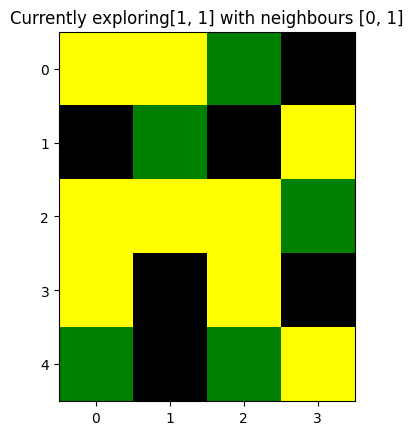

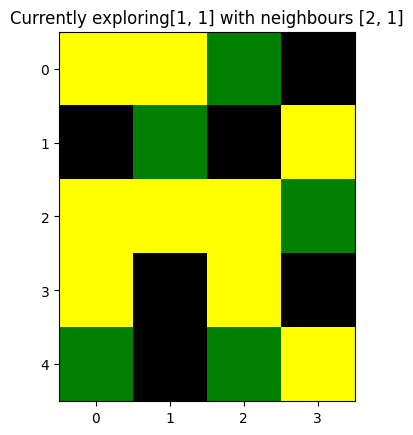

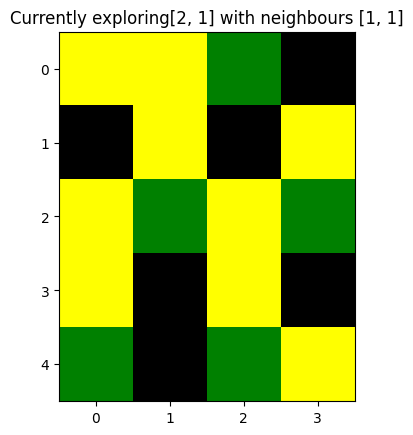

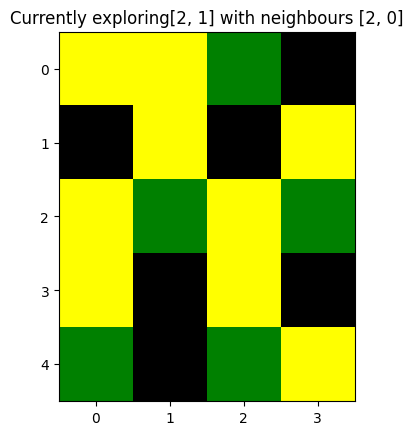

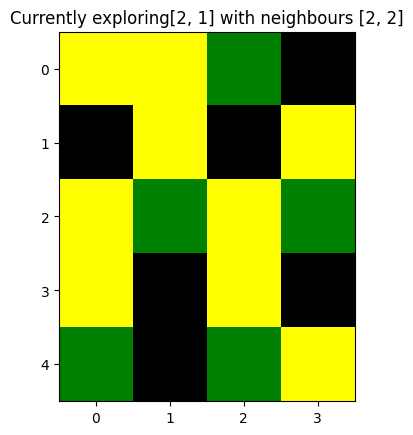

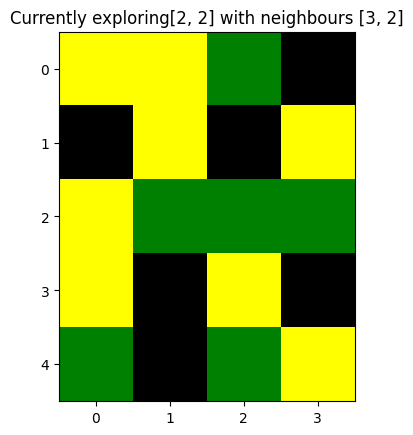

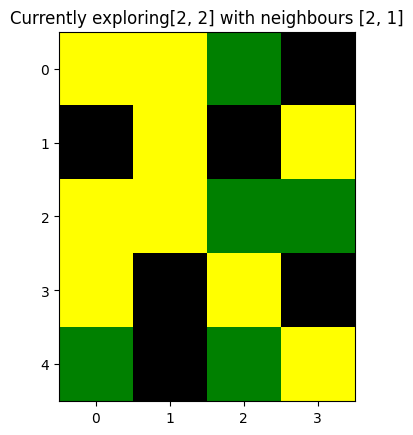

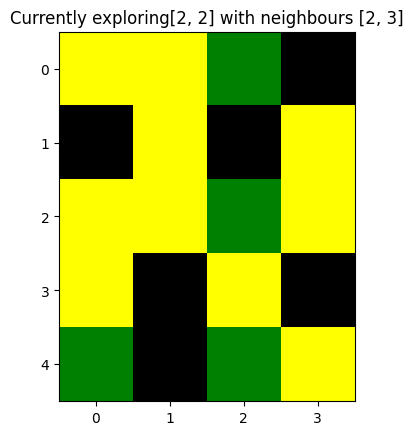

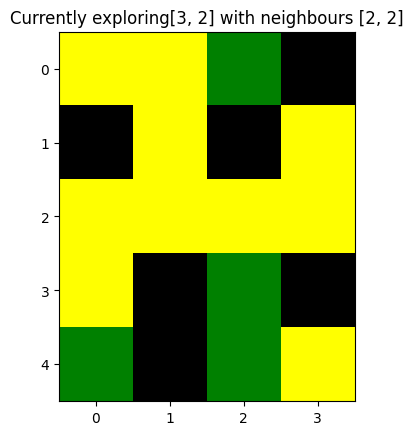

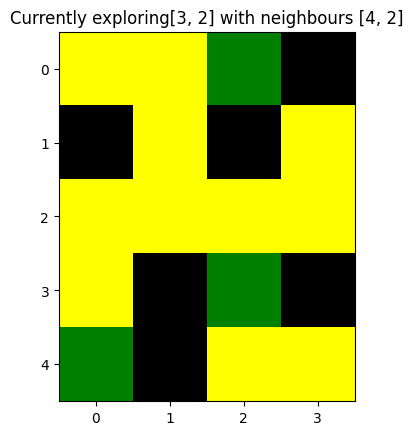

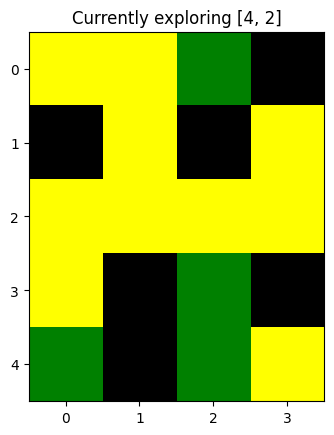

'Goal reached'

In [46]:
tree_search(grid,[0,0],[4,2])

# Graph Search

In [48]:
def graph_search(grid,start,goal):
  m,n=grid.shape
  frontier=[]

  heapq.heappush(frontier,[manhattan(start,goal),0,start])

  while frontier:
    f,g,current=heapq.heappop(frontier)
    if not is_valid(current,m,n):
      continue
    if grid[current[0],current[1]]==0:
      continue
    grid[current[0],current[1]]=0

    if current==goal:
      plot_grid(grid,current)
      return 'Goal reached'

    directions=[(-1,0),(1,0),(0,-1),(0,1)]

    for d in directions:
      new=current+np.array(d)
      next=list(new)

      if is_valid(next,m,n) and grid[next[0],next[1]]!=-1:
        g_next=g+1
        f_next=g_next+manhattan(next,goal)
        heapq.heappush(frontier,[f_next,g_next,next])
        grid[next[0],next[1]]=2
        plot_grid(grid,current,next)
  plot_grid(grid,current)

  return 'Goal not found'



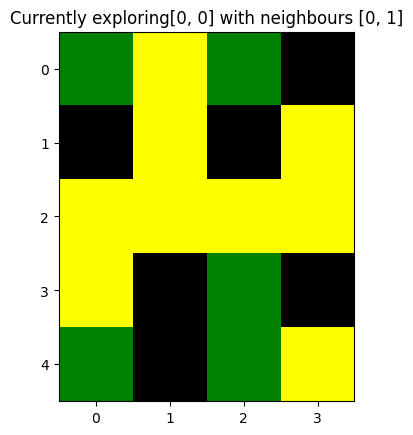

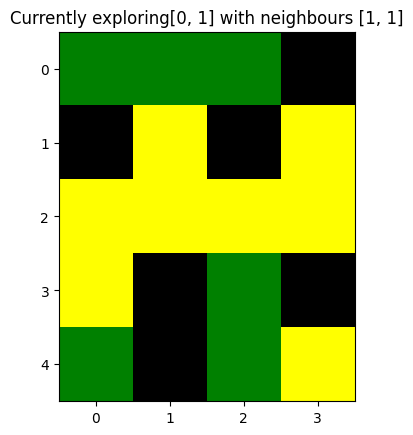

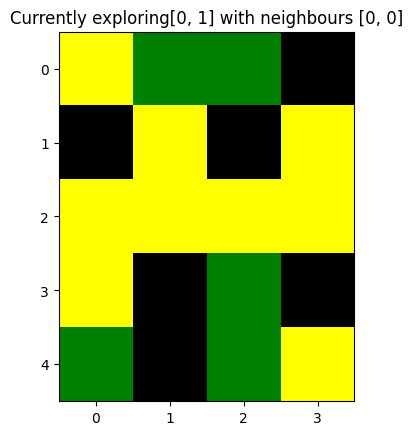

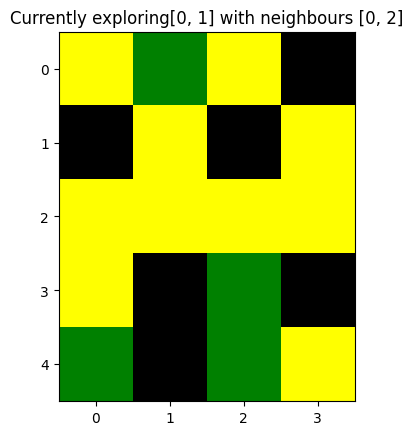

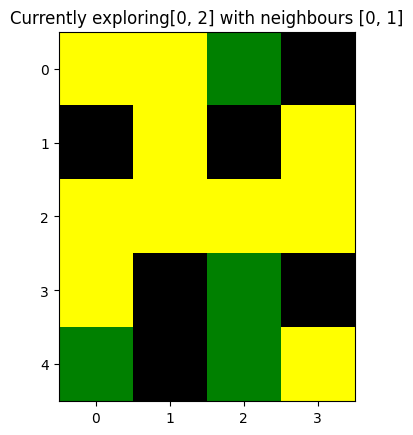

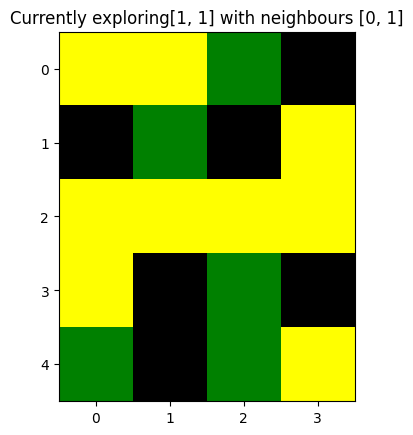

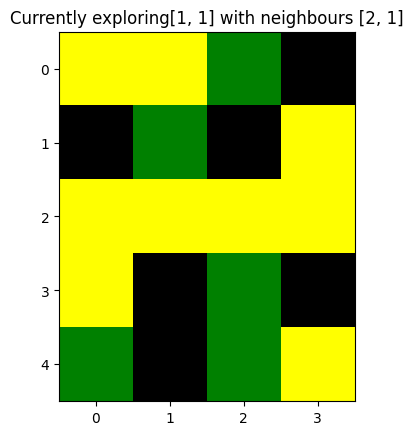

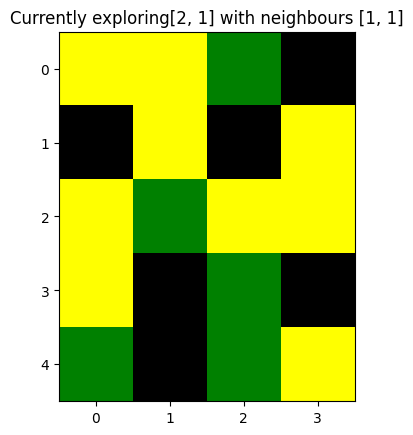

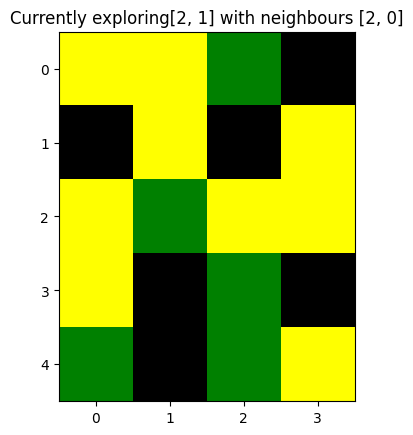

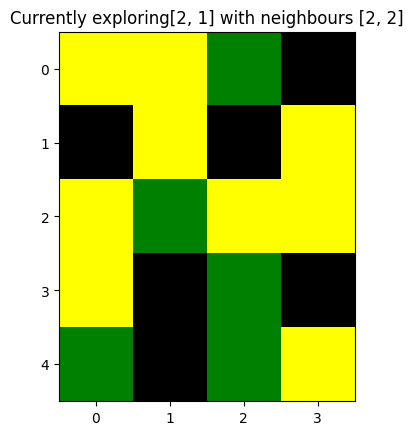

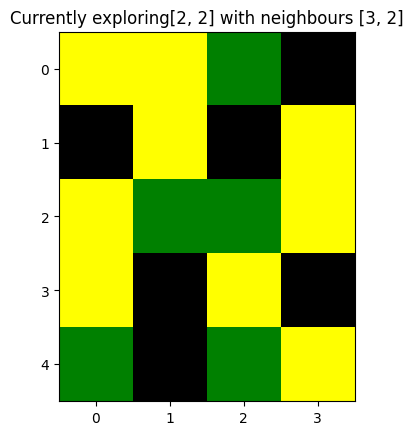

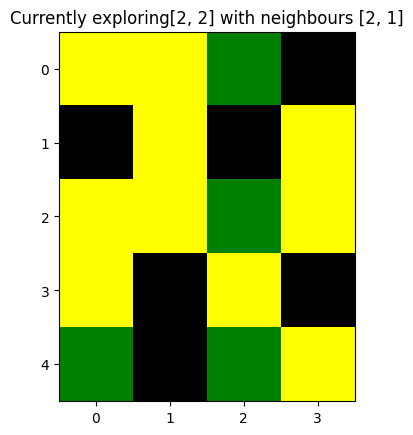

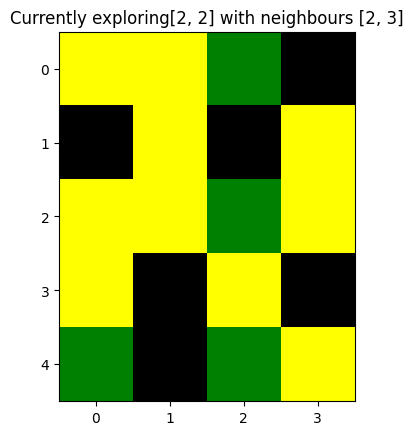

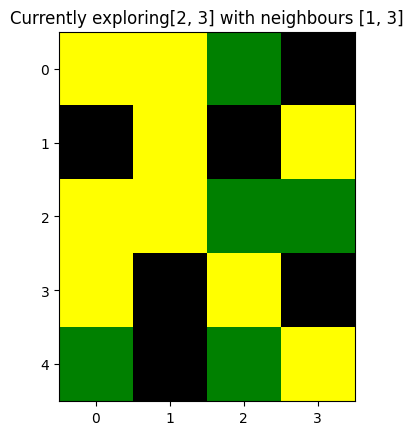

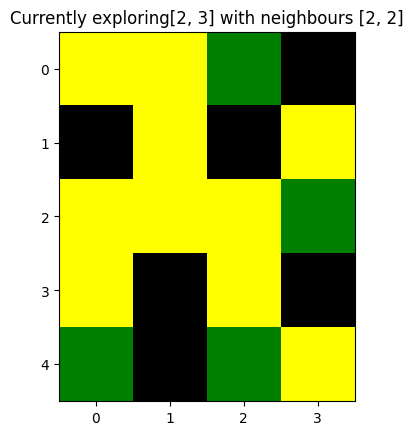

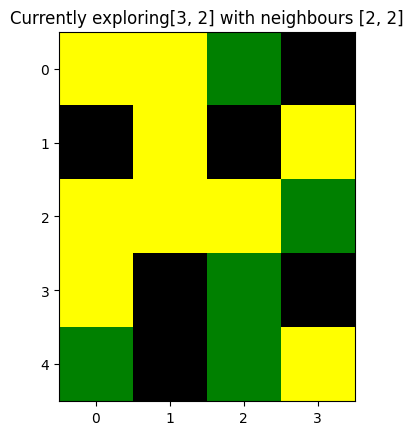

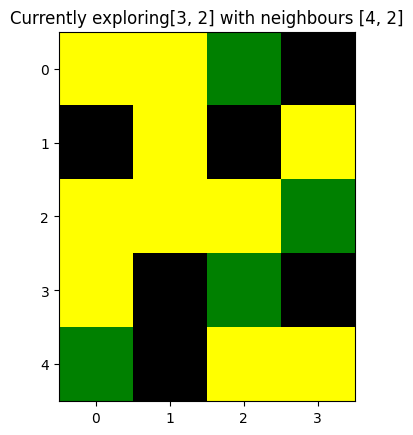

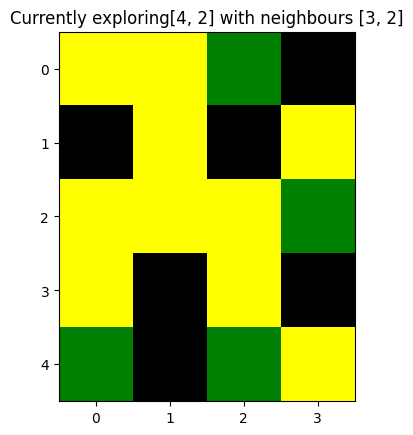

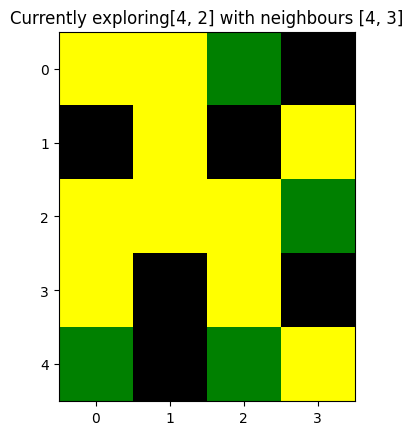

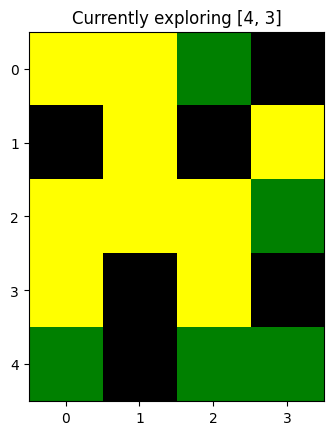

'Goal reached'

In [49]:
graph_search(grid,[0,0],[4,3])